<div style="background-color: #28a745; color: white; padding: 15px 20px; border-radius: 8px; font-size: 26px; font-weight: bold; text-align: center;">
    Typhoon-OCR-7B: Evaluating Document Parsing Capabilities Across Various Use Cases
</div>

# Introduction

In this notebook, we explore the capabilities of the [`scb10x/typhoon-ocr-7b`](https://huggingface.co/scb10x/typhoon-ocr-7b) model, a bilingual document parsing tool developed by SCB 10X. This model is engineered to process real-world documents in both Thai and English, leveraging a vision-language architecture based on Qwen2.5-VL-Instruction. Unlike traditional OCR systems that extract raw text, Typhoon-OCR-7B delivers semantically structured outputs, preserving the layout and context of the original documents. It is adept at handling a variety of document types, including financial reports, academic papers, government forms, receipts, menus, tickets, and infographics. The model's design emphasizes robustness against noisy inputs and complex layouts, making it a valuable tool for tasks such as Retrieval-Augmented Generation (RAG) and comprehensive document understanding.

# **1. Install Libraries**

In [1]:
%%capture
! pip install typhoon-ocr
! apt-get update && apt-get install -y poppler-utils
! pip install markdown2
! pip install lxml

# **2. Import Libraries**

In [2]:
from PIL import Image
from IPython.display import display, HTML
import json
from rich.pretty import pprint
from rich.table import Table
from rich.markdown import Markdown
import base64
import markdown
import markdown2

import io
from io import BytesIO, StringIO

import warnings
import sys
import contextlib
import pandas as pd

from pdf2image import convert_from_path
import re

In [3]:
import os
from typhoon_ocr import ocr_document

os.environ['TYPHOON_OCR_API_KEY'] = "s****************************************" #You can get an API key from https://opentyphoon.ai/

# **3. Inference**

In [4]:
def display_text_with_pdf_or_image_plain(raw_text, file_path, pdf_page=0, max_width=800):
    warnings.filterwarnings('ignore', category=FutureWarning)
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    
    # --- Image/PDF Display Part ---
    if file_path.lower().endswith(".pdf"):
        images = convert_from_path(file_path, first_page=pdf_page+1, last_page=pdf_page+1)
        img = images[0].convert("RGB")
    else:
        img = Image.open(file_path).convert("RGB")
    
    w_percent = max_width / float(img.width)
    new_height = int(float(img.height) * w_percent)
    img = img.resize((max_width, new_height), Image.LANCZOS)
    
    buffer = BytesIO()
    img.save(buffer, format="JPEG", quality=70)
    img_data = base64.b64encode(buffer.getvalue()).decode()
    html = f"""
    <div style="text-align: center;">
        <img src="data:image/jpeg;base64,{img_data}" style="width: 100%; border: 1px solid #ccc;" />
    </div>
    """
    display(HTML(html))
    # --- Markdown as plain text + tables as DataFrames ---
    html_tables = list(re.finditer(r'(<table[\s\S]*?</table>)', raw_text, re.IGNORECASE))
    last_end = 0
    for match in html_tables:
        text_before = raw_text[last_end:match.start()]
        if text_before.strip():
            print(text_before.strip())
            print('-' * 40)
        table_html = match.group(1)
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", FutureWarning)
                warnings.simplefilter("ignore", RuntimeWarning)
                df_list = pd.read_html(StringIO(table_html))
                for df in df_list:
                    df = df.fillna("")
                    df.columns = df.iloc[0]
                    df = df[1:].reset_index(drop=True)
                    display(df)
        except Exception as e:
            print("Error parsing HTML table:", e)
        last_end = match.end()
    # Print any remaining text after the last table
    if last_end < len(raw_text):
        text_after = raw_text[last_end:].strip()
        if text_after:
            print(text_after)

## **Example n°1**


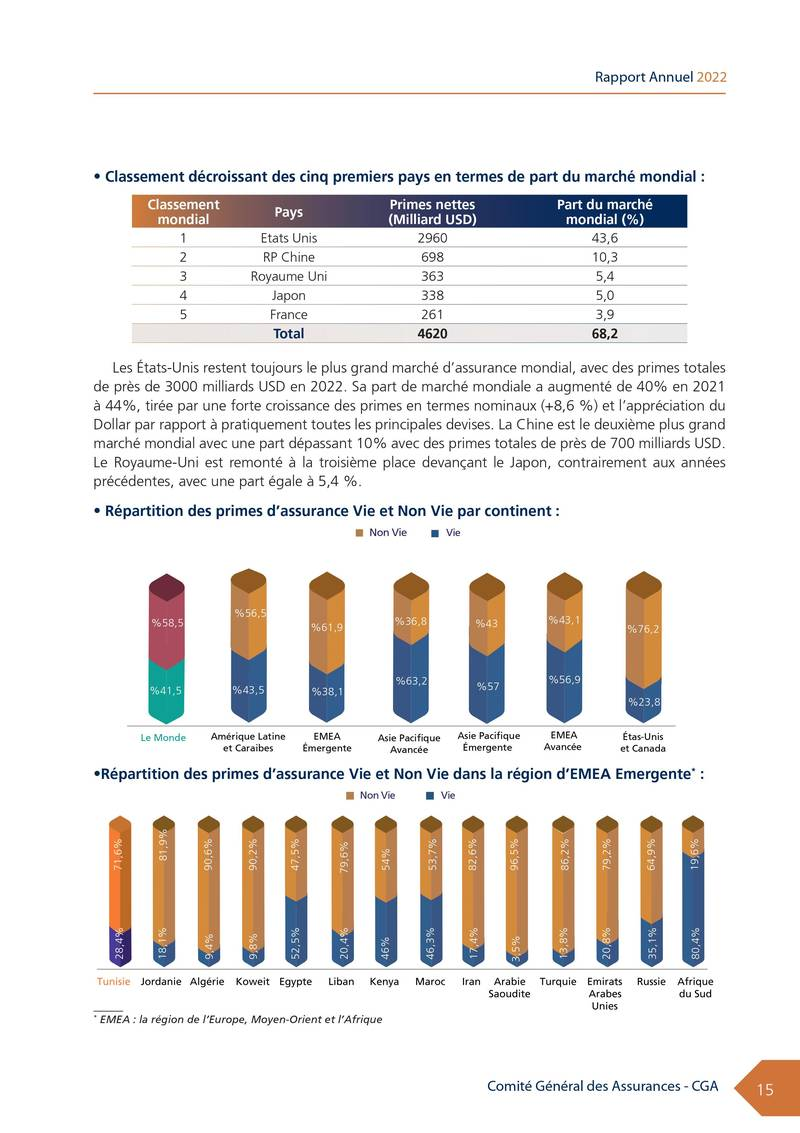

# Top 5 Countries in Global Insurance Market

## Country Rankings
| Rank | Country       | Premiums (Million USD) | World Market Share (%) |
|------|---------------|------------------------|--------------------|
| 1    | United States | 2960                    | 43.6               |
| 2    | People's Republic of China | 698                     | 10.3              |
| 3    | United Kingdom | 363                      | 5.4                |
| 4    | Japan          | 338                      | 5.0                |
| 5    | France         | 261                      | 3.9                |
|      | Total         | 4620                    | 68.2               |

The United States continues to hold the largest position in the global insurance market, with total premiums reaching approximately 3000 billion USD in 2022. Its share of the world market has increased by 40% from 2021 to 2022, amounting to 44%. This growth is mainly attributed to the recovery of the economy and the increase in insuran

In [5]:
image_path = '/kaggle/input/cga-images/RAP_CGA_FR_ANG_2022-images-15.jpg'
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

## **Example n°2**


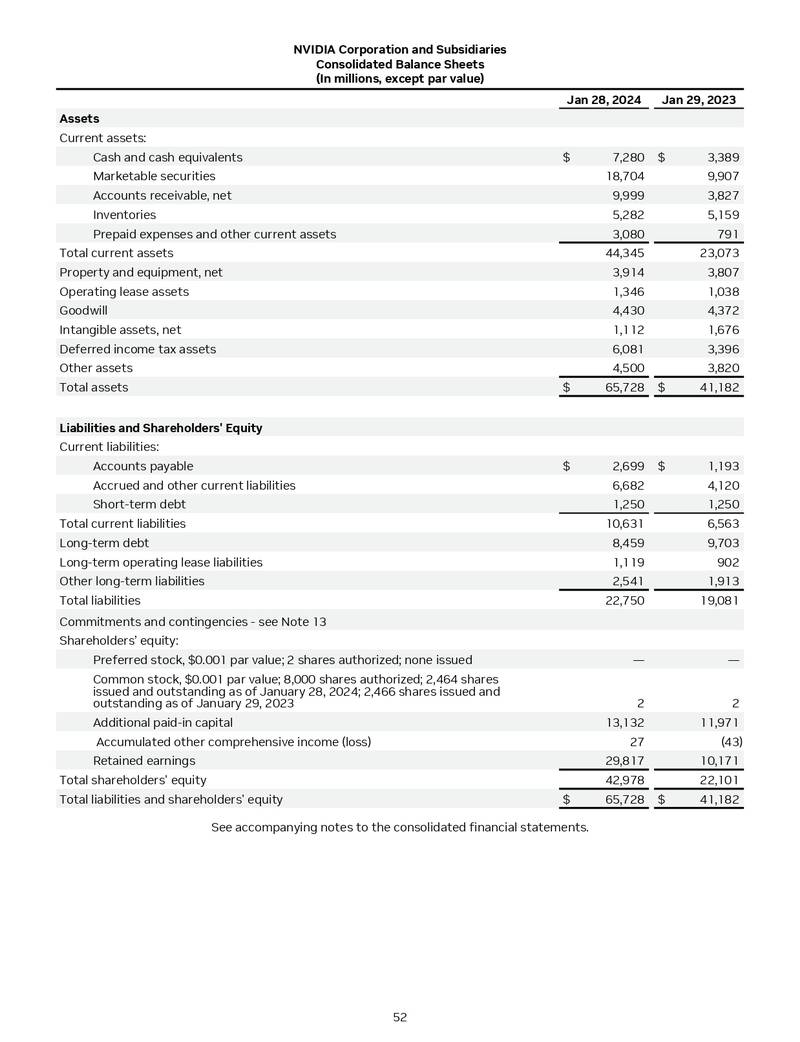

# NVIDIA Corporation and Subsidiaries Consolidated Balance Sheets (In millions, except par value)
----------------------------------------


,Assets,,
0,Current assets:,,
1,Cash and cash equivalents,"$ 7,280","$ 3,389"
2,Marketable securities,18704,9907
3,"Accounts receivable, net",9999,3827
4,Inventories,5282,5159
5,Prepaid expenses and other current assets,3080,791
6,Total current assets,44345,23073
7,"Property and equipment, net",3914,3807
8,Operating lease assets,1346,1038
9,Goodwill,4430,4372


See accompanying notes to the consolidated financial statements.

PageNumber: 52


In [6]:
image_path = '/kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-14_page-0001.jpg'
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

## **Example n°3**


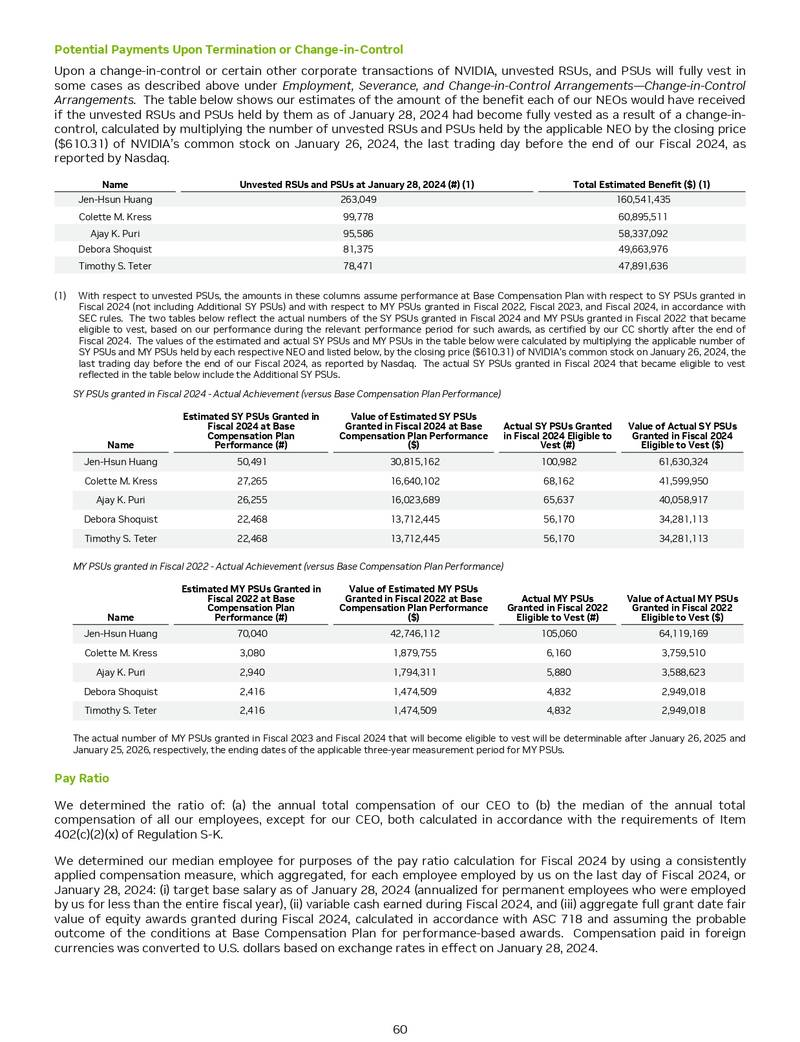

# Potential Payments Upon Termination or Change-in-Control

Upon a change-in-control or certain other corporate transactions of NVIDIA, unvested RSUs and PSUs will fully vest in some cases as described above under Employment, Severance, and Change-in-Control Arrangements-Change-in-Control Arrangements. The table below shows our estimates of the amount of the benefit each of our NEOs would have received if the unvested RSUs and PSUs held by them as of January 28, 2024 had become fully vested as a result of a change-in-control, calculated by multiplying the number of unvested RSUs and PSUs held by the applicable NEO by the closing price ($610.31) of NVIDIA's common stock on January 26, 2024, the last trading day before the end of our Fiscal 2024, as reported by Nasdaq.
----------------------------------------


,Jen-Hsun Huang,263049,160541435
0,Colette M. Kress,99778,60895511
1,Ajay K. Puri,95586,58337092
2,Debora Shoquist,81375,49663976
3,Timothy S. Teter,78471,47891636


(1)
With respect to unvested PSUs, the amounts in these columns assume performance at Base Compensation Plan with respect to SY PSUs granted in Fiscal 2024 (not including Additional SY PSUs) and with respect to MY PSUs granted in Fiscal 2022, Fiscal 2023, and Fiscal 2024, in accordance with SEC rules. Two tables below reflect the actual numbers of the SY PSUs granted in Fiscal 2024 and MY PSUs granted in Fiscal 2022 that became eligible to vest, based on our performance during the relevant performance period for such awards, as certified by our CC shortly after the end of Fiscal 2024. The values of the estimated and actual SY PSUs and MY PSUs in the table below were calculated by multiplying the applicable number of SY PSUs and MY PSUs held by each respective NEO and listed below, by the closing price ($610.31) of NVIDIA's common stock on January 26, 2024, the last trading day before the end of our Fiscal 2024, as reported by Nasdaq. The actual SY PSUs granted in Fiscal 2024 that becam

,Jen-Hsun Huang,50491,,30815162,,100982,,61630324,
0,Colette M. Kress,27265,,16640102,,68162,,41599950,
1,Ajay K. Puri,26255,,16023689,,65637,,40058917,
2,Debora Shoquist,22468,,13712445,,56170,,34281113,
3,Timothy S. Teter,22468,,13712445,,56170,,34281113,


MY PSUs granted in Fiscal 2022 - Actual Achievement (versus Base Compensation Plan Performance)
----------------------------------------


,Jen-Hsun Huang,70040,,42746112,,105060,,64119169,
0,Colette M. Kress,3080,,1879755,,6160,,3759510,
1,Ajay K. Puri,2940,,1794311,,5880,,3588623,
2,Debora Shoquist,2416,,1474509,,4832,,2949018,
3,Timothy S. Teter,2416,,1474509,,4832,,2949018,


The actual number of MY PSUs granted in Fiscal 2023 and Fiscal 2024 that will become eligible to vest will be determinable after January 26, 2025 and January 25, 2026, respectively, the ending dates of the applicable three-year measurement period for MY PSUs.
## Pay Ratio

We determined the ratio of: (a) the annual total compensation of our CEO to (b) the median of the annual total compensation of all our employees, except for our CEO, both calculated in accordance with the requirements of Item 402(c)(2)(x) of Regulation S-K.

We determined our median employee for purposes of the pay ratio calculation for Fiscal 2024 by using a consistently applied compensation measure, which aggregated, for each employee employed by us on the last day of Fiscal 2024, or January 28, 2024: (i) target base salary as of January 28, 2024 (annualized for permanent employees who were employed by us for less than the entire fiscal year), (ii) variable cash earned during Fiscal 2024, and (iii) aggregate full g

In [7]:
image_path = '/kaggle/input/different-tables-images-testing/NVIDIA_Report_Removed_Pages-1-16-5_page-0001.jpg'
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

## **Example n°4**


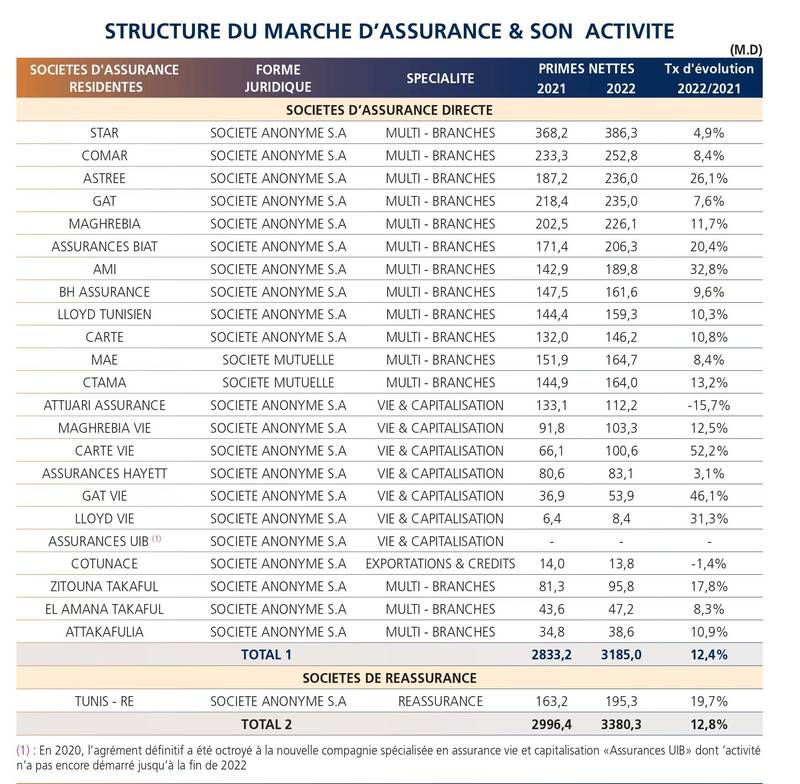

# STRUCTURE DU MARCHE D'ASSURANCE & SON ACTIVITE
----------------------------------------


,,SOCIITES D'ASSURANCE DIRECTE,SOCIITES D'ASSURANCE DIRECTE,SOCIITES D'ASSURANCE DIRECTE,SOCIITES D'ASSURANCE DIRECTE,SOCIITES D'ASSURANCE DIRECTE
0,STAR,SOCIETY ANONYME S.A,MULTI - BRANCHES,3682,3863,"4,9%"
1,COMAR,SOCIETY ANONYME S.A,MULTI - BRANCHES,2333,2528,"8,4%"
2,ASTREE,SOCIETY ANONYME S.A,MULTI - BRANCHES,1872,2360,"26,1%"
3,GAT,SOCIETY ANONYME S.A,MULTI - BRANCHES,2184,2350,"7,6%"
4,MAGHREBIA,SOCIETY ANONYME S.A,MULTI - BRANCHES,2025,2261,"11,7%"
5,ASSURANCES BIAT,SOCIETY ANONYME S.A,MULTI - BRANCHES,1714,2063,"20,4%"
6,AMI,SOCIETY ANONYME S.A,MULTI - BRANCHES,1429,1898,"32,8%"
7,BH ASSURANCE,SOCIETY ANONYME S.A,MULTI - BRANCHES,1475,1616,"9,6%"
8,LLOYD TUNISIEN,SOCIETY ANONYME S.A,MULTI - BRANCHES,1444,1593,"10,3%"
9,CARTE,SOCIETY ANONYME S.A,MULTI - BRANCHES,1320,1462,"10,8%"


(1) : En 2020, l'agrément définitif a été octroyé à la nouvelle compagnie specialisée en assurance vie et capitalisation «Assurances UIB» dont l'activité n'a pas encore démarre jusqu'à la fin de 2022


In [7]:
image_path = "/kaggle/input/different-tables-images-testing/other_table_big.jpg"
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

## **Example n°5**


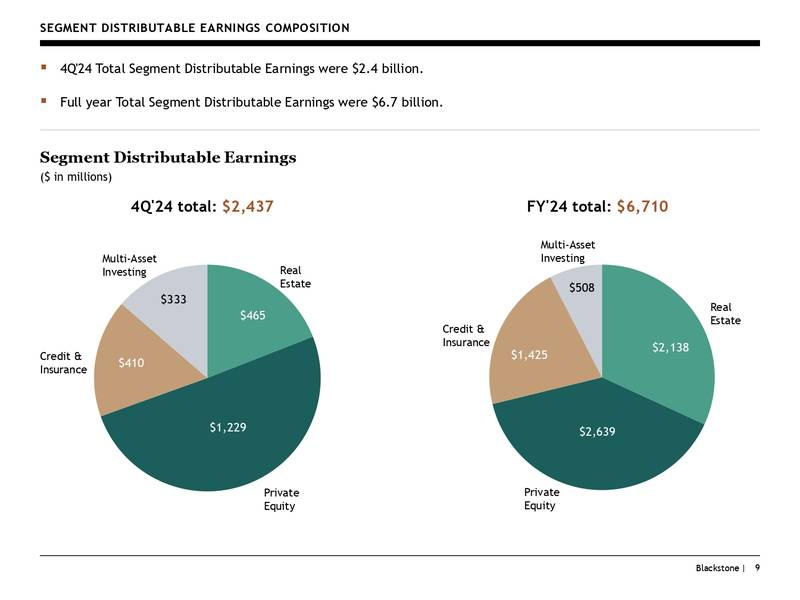

# SEGMENT DISTRIBUTABLE EARNINGS COMPOSITION

- 4Q'24 Total Segment Distributable Earnings were $2.4 billion.
- Full year Total Segment Distributable Earnings were $6.7 billion.
# Segment Distributable Earnings ($ in millions)
<figure>**Observation:** The image shows a pie chart divided into five segments. Each segment represents a different category and includes a numerical value.
**Text Recognition:**
*   "Multi-Asset Investing": $333
*   "Real Estate": $465
*   "Credit & Insurance": $410
*   "Private Equity": $1,229
*   "Total": $2,437
**Final Summary:** The image presents a pie chart illustrating the distribution of assets across five categories: Multi-Asset Investing ($333), Real Estate ($465), Credit & Insurance ($410), Private Equity ($1,229). The total assets are $2,437.</figure>
FY'24 total: $6,710
<figure>**Observation:** The image shows a pie chart divided into four sections. Each section is labeled with a category and a number.
**Text Recognition:**
*   "Multi-Asset Investi

In [9]:
image_path = '/kaggle/input/pdf-files-pages/Blackstone4Q24EarningsPressRelease_page-0013.jpg'
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

## **Example n°6**


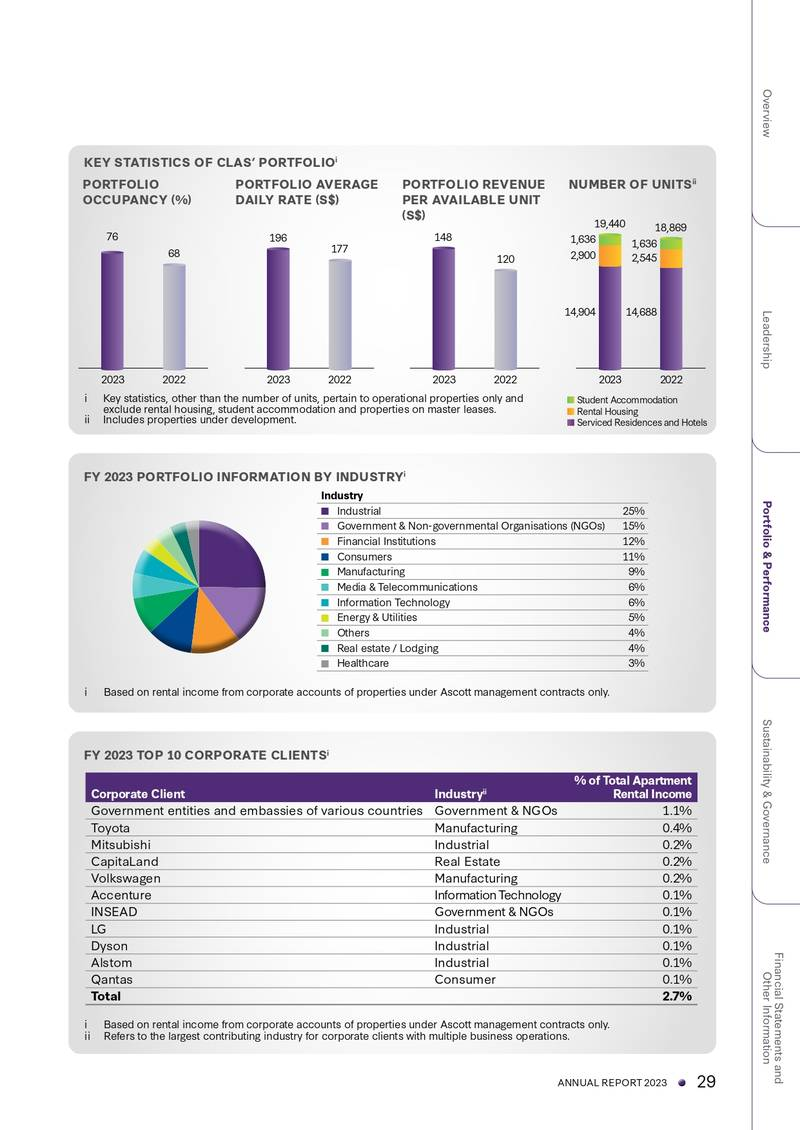

# KEY STATISTICS OF CLAS' PORTFOLIO

## Portfolio Overview
- **Portfolio Occupancy (%)**
    - 2023: 76
    - 2022: 68

- **Portfolio Average Daily Rate (S$)**
    - 2023: 196
    - 2022: 177

- **Portfolio Revenue per Available Unit (S$)**
    - 2023: 148
    - 2022: 120

- **Number of Units**
    - 2023:
        - Student Accommodation: 19,440
        - Rental Housing: 1,636
        - Serviced Residences and Hotels: 2,545
    - 2022:
        - Student Accommodation: 18,869
        - Rental Housing: 1,636
        - Serviced Residences and Hotels: 2,545

## FY 2023 PORTFOLIO INFORMATION BY INDUSTRY

### Industry Breakdown
| Industry | Percentage |
| --- | --- |
| Industrial | 25% |
| Government & Non-governmental Organisations (NGOs) | 15% |
| Financial Institutions | 12% |
| Consumers | 11% |
| Manufacturing | 9% |
| Media & Telecommunications | 6% |
| Information Technology | 6% |
| Energy & Utilities | 5% |
| Others | 4% |
| Real estate / Lodging | 4% |
| Healthcare | 3% |

* Based 

In [10]:
image_path = '/kaggle/input/pdf-files-pages/CLAS-FY2023-AR_page-0031.jpg'
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

## **Example n°7**


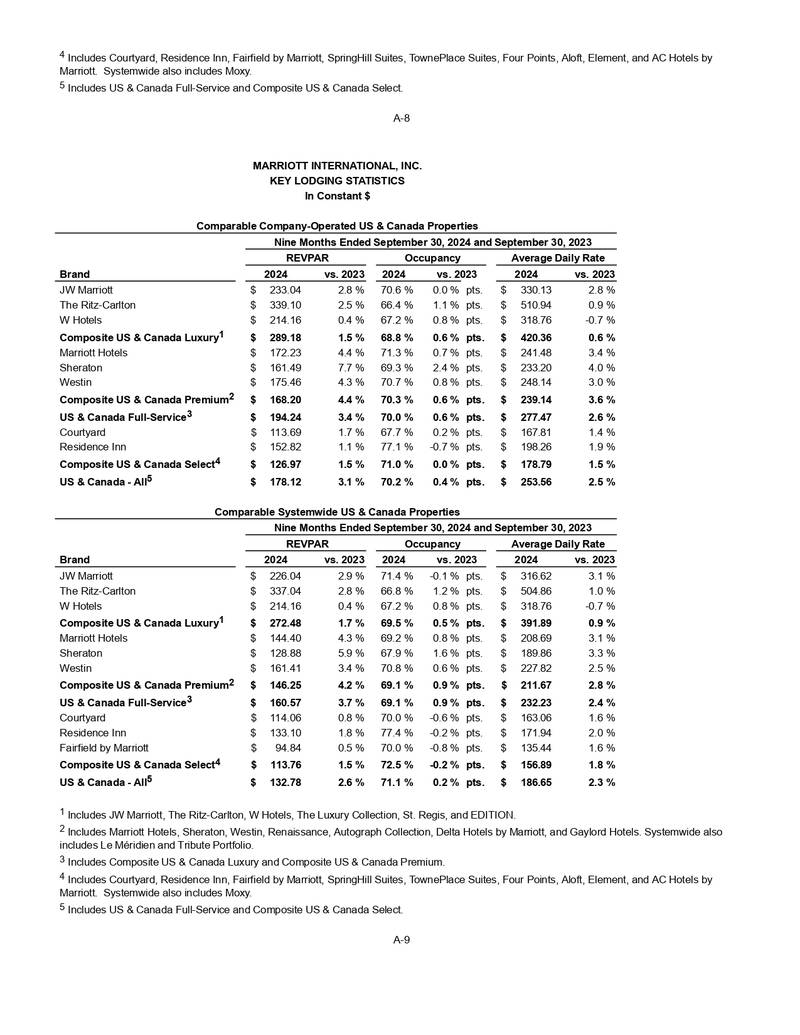

4 includes Courtyard, Residence Inn, Fairfield by Marriott, SpringHill Suites, TownePlace Suites, Four Points, Aloft, Element, and AC Hotels by
Marriott. Systemwide also includes Moxy.

5 Includes US & Canada Full-Service and Composite US & Canada Select.

MARRIOTT INTERNATIONAL, INC.
KEY LODGING STATISTICS
In Constant $

Comparable Company-Operated US & Canada Properties

| Brand                        | Nine Months Ended September 30, 2024 |         | Average Daily Rate |
|------------------------------|-------------------------------------|---------|-------------------|
|                              | REVPAR                               | Occupancy |                  |
|                              | 2024                                   | 2023       | 2024              | 2023             |
| JW Marriott                    | $ 233.04                             | 2.8 %     | 70.6 %            | 0.0 % pts        |
| The Ritz-Carlton               | $ 339.10                       

In [11]:
image_path = '/kaggle/input/pdf-files-pages/Marriott International Reports Third Quarter 2024 Results_page-0011.jpg'
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

## **Example n°8**


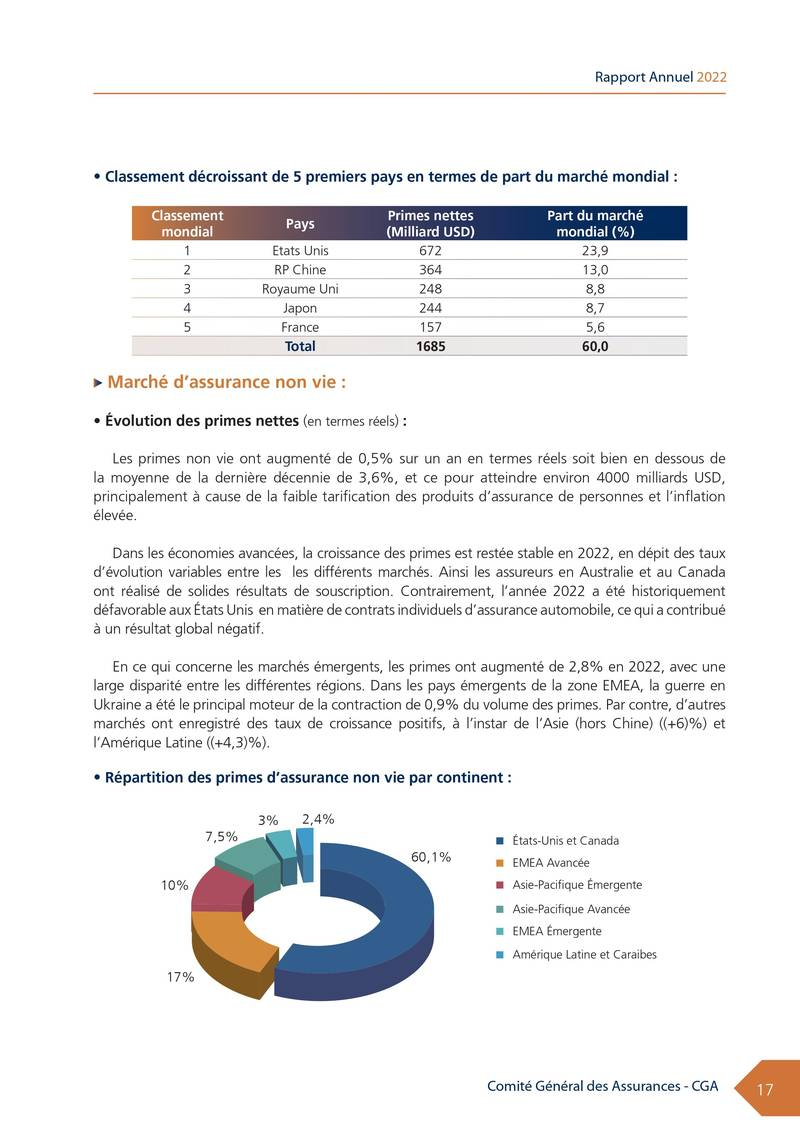

# Top 5 Countries in terms of Global Market Share

## Table
| Rank | Country      | Net Premiums (Million USD) | Global Market Share (%) |
|------|--------------|---------------------------|------------------------|
| 1    | United States | 672                       | 23.9                   |
| 2    | People's Republic of China | 364                     | 13.0                   |
| 3    | United Kingdom | 248                       | 8.8                    |
| 4    | Japan         | 244                       | 8.7                    |
| 5    | France        | 157                       | 5.6                    |
| Total |              | 1685                      | 60.0                   |

## Graph Insights
- The graph shows the distribution of global insurance premiums across different regions.
- The largest region is EMEA Advanced at 60.1%.
- Other regions include Asia-Pacific Emerging (17%), Asia-Pacific Advanced (10%), and Americas Latin and Caribean (7.5%).

## Key Takeaways
- Insur

In [12]:
image_path = '/kaggle/input/cga-images/RAP_CGA_FR_ANG_2022-images-17.jpg'
markdown = ocr_document(image_path, task_type = "default")
display_text_with_pdf_or_image_plain(markdown, image_path)

# Conclusion

Based on the results obtained, the `scb10x/typhoon-ocr-7b` model demonstrates a strong ability to accurately parse most of the data. During the experimentation, I opted for the `default` task_type instead of `structure`, as I did not observe any significant differences in the results. This suggests that the model is well-suited for parsing tasks, even without the additional structure specification. Future improvements could explore further optimizations, but overall, the model provides reliable performance in parsing the required data.